#**Submission 1 : Predictive Analytics**
____________________________________________________________
____________________________________________________________

#**Data Diri**
____________________________________________________________
____________________________________________________________

Nama            : **Doli sawaluddin**

E-mail Dicoding : **dholys7@gmail.com**
____________________________________________________________
____________________________________________________________

Dataset :
*   [Bandung Housing Price Dataset](https://www.kaggle.com/datasets/khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung)
*  [ Dataset Harga Rumah Bandung](https://www.kaggle.com/datasets/rafliaping/dataset-harga-rumah-bandung)


References:

*   [Predicting House Prices](https://www.kaggle.com/code/burhanykiyakoglu/predicting-house-prices)
*   [Memahami Data Dengan Exploratory Data Analysis](https://medium.com/data-folks-indonesia/memahami-data-dengan-exploratory-data-analysis-a53b230cce84)
*   [Daftar kecamatan dan kelurahan di Kota Bandung](https://p2k.stekom.ac.id/ensiklopedia/Daftar_kecamatan_dan_kelurahan_di_Kota_Bandung)
*   [Prediksi Harga Rumah di Jakarta Selatan](https://deepnote.com/app/ahmad-faishal-albadri-2012/Prediksi-Harga-Rumah-di-Jakarta-Selatan-6c3c9b5a-d2dc-4da1-b5bc-202f4c03d889)
*   [Prediksi Harga Rumah dengan Machine Learning](https://noerbarry.medium.com/prediksi-harga-rumah-dengan-machine-learning-fa9363c45c0b)
















#**1. Import Library yang diperlukan**

In [1]:
import os
import zipfile
from google.colab import files
import shutil


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

import warnings
from scipy.stats.mstats import winsorize



**Import Library yang diperlukan:**

- **os:** Merupakan Sebuah Library yang digunakan untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori.
- **zipfile:** Merupakan Sebuah Library yang digunakan  untuk mengolah file zip, seperti mengekstrak atau membuat file zip.
- **google.colab.files:** Merupakan Sebuah Library yang digunakan untuk berinteraksi dengan file di Google Colab, seperti mengunggah atau mengunduh file.
- **shutil:** Library ini digunakan untuk mengolah file dan direktori, seperti mengcopy atau menghapus file.
- **pandas:** adalah Library untuk mengolah data tabular, seperti membaca, menulis, dan memanipulasi DataFrame.
- **numpy:** Library ini berguna untuk komputasi numerik, seperti array dan matriks.
- **matplotlib.pyplot:** Library ini berfungsi untuk membuat plot dan grafik.
- **seaborn:** Library untuk membuat visualisasi data statistik yang lebih baik dan canggih.
- **Library sklearn** untuk melakukan pemrosesan machine learning dan data analysis.
- **warnings**, Untuk menangani pesan peringatan dari sistem
- **winsorize**,teknik transformasi statistik yang membatasi nilai ekstrem dalam data statistik untuk mengurangi pengaruh outlier.



**Catatan:**
- Library-library tersebut digunakan dalam konteks proyek analitik prediktif.
- Import library dilakukan di awal script untuk memastikan bahwa library-library yang dibutuhkan tersedia sebelum script dijalankan.


#**2. Data Loading**

##**2.1. Download Dataset**

*   Mengakses dan mengunduh dataset yang diperlukan dari Kaggle menggunakan API dari kaggle.
*   Data yang akan didownload merupakan daftar penjualan rumah pada seluruh kecamatan pada kota bandung.
*   Dataset yang digunakan bernama  *results_cleaned*  berekstensi *.csv* , data_rumah.xlsx dan  kelurahan.xlsx



**Mengunduh dataset dari kaggle**

In [3]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list -s "harga-rumah-seluruh-kecamatan-di-kota-bandung"
!kaggle datasets download -d khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung
!kaggle datasets list -s "dataset-harga-rumah-bandung"
!kaggle datasets download -d rafliaping/dataset-harga-rumah-bandung

Saving kaggle.json to kaggle (1).json
ref                                                        title                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------  -----  -------------------  -------------  ---------  ---------------  
khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung  Daftar Harga Rumah di Kota Bandung  344KB  2024-04-22 16:29:38            413          6  0.88235295       
Dataset URL: https://www.kaggle.com/datasets/khaleeel347/harga-rumah-seluruh-kecamatan-di-kota-bandung
License(s): Attribution 4.0 International (CC BY 4.0)
harga-rumah-seluruh-kecamatan-di-kota-bandung.zip: Skipping, found more recently modified local copy (use --force to force download)
ref                                                        title                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----

**Mengunduh data kelurahan dan kecamatan dari Google Sheets**

In [4]:
!wget -O kelurahan.xlsx 'https://docs.google.com/spreadsheets/d/1Ub_VtM4_WMxCJeCSynKRtAhEonfzgRjI/export?format=xlsx&gid=371747489'

--2024-10-16 06:18:48--  https://docs.google.com/spreadsheets/d/1Ub_VtM4_WMxCJeCSynKRtAhEonfzgRjI/export?format=xlsx&gid=371747489
Resolving docs.google.com (docs.google.com)... 74.125.135.101, 74.125.135.102, 74.125.135.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.135.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0k-08-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/0h1fc3letgufihasmt73aa9nl4/1729059525000/116957577214223376809/*/1Ub_VtM4_WMxCJeCSynKRtAhEonfzgRjI?format=xlsx&gid=371747489 [following]
--2024-10-16 06:18:49--  https://doc-0k-08-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/0h1fc3letgufihasmt73aa9nl4/1729059525000/116957577214223376809/*/1Ub_VtM4_WMxCJeCSynKRtAhEonfzgRjI?format=xlsx&gid=371747489
Resolving doc-0k-08-sheets.googleusercontent.com (doc-0k-08-sheets.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0k-08-sheets.goo

##**2.2. Dataset Preparation**

Melakukan Ekstraksi pada file yang telah didownload, dan menampilkan isi dari dataset  kedalam dataframe dengan memanfaatkan *library pandas.*

In [5]:
local_zip = '/content/harga-rumah-seluruh-kecamatan-di-kota-bandung.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
local_zip = '/content/dataset-harga-rumah-bandung.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
rumah_1= pd.read_csv('/content/results_cleaned.csv')
rumah_1

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176
...,...,...,...,...,...,...,...,...
7604,"Rumah Lux Terawat di Taman Sakura Raya , Bandung","Babakanciparay, Bandung",4,5,0,11000000000,600,500
7605,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,3200000000,200,600
7606,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,5500000000,375,290
7607,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,4890000000,375,290


Berdasarkan Dataframe diatas kita mendapatkan data sebagai berikut:


*   **house_name:** Nama atau judul properti residensial.
*   **location:** Lokasi atau kecamatan di Bandung di mana properti tersebut berada.
*   **bedroom_count:** Jumlah kamar tidur di properti tersebut.
*  **bathroom_count:** Jumlah kamar mandi di properti tersebut.
*  **carport_count:** Jumlah tempat parkir/garasi yang tersedia pada properti tersebut.
*   **price:** Harga properti tersebut dalam Rupiah Indonesia (IDR).
*   **land_area:** Total luas tanah properti tersebut dalam meter persegi.
*   **building_area:** Total luas bangunan properti tersebut dalam meter persegi.







**Mengganti nama kolom land_area menjadi land_area(m2) agar memudahkan pemaham terkait nilai didalamnya yang merupakan ukuran luas**


In [8]:
rumah_1.rename(columns={'land_area': 'land_area(m2)'}, inplace=True)
rumah_1

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area(m2),building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176
...,...,...,...,...,...,...,...,...
7604,"Rumah Lux Terawat di Taman Sakura Raya , Bandung","Babakanciparay, Bandung",4,5,0,11000000000,600,500
7605,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,3200000000,200,600
7606,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,5500000000,375,290
7607,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,4890000000,375,290


**Loading dataset tambahan untuk memperkaya data**

In [9]:
rumah_2 = pd.read_excel('/content/data_rumah.xlsx')
rumah_2


,Unnamed: 0,judul,alamat,deskripsi,kamar,bangunan,lahan,harga
0,0,Promo Rumah Mewah Akhir Tahun,"Antapani, Bandung",Promo akhir tahun !! Hanya 500 jt-an + FREE SH...,3,75,84,590000000
1,1,Rumah modern Readystock di bandung raya cimahi...,"Bandung Wetan, Bandung",Rumah Baru modern 2 LT di Sayap Kota Cimahi de...,3,70,71,700000000
2,2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,"Padalarang, Bandung",*Jadilah konsumen CERDAS !* *Tips singkat sebe...,2,36,72,386000000
3,3,Dijual PROMO rumah 2 lantai di sayap Setiabudi...,Bandung,Copy writing nasc NUANSA ALAM SETIABUDHI CLOV...,2,60,60,499000000
4,4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,"Cibiru Hilir, Bandung","Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...",2,90,114,397500000
...,...,...,...,...,...,...,...,...
1465,1465,Rumah Lama Turangga,"Turangga, Bandung",Di jual rumah lama turangga\nLuas tanah : 240 ...,6,280,240,2800000000
1466,1466,Rumah di nirwana residence bandung siap huni t...,Bandung,"Rumah bagus siap huni dan terawat, dekat denga...",3,180,90,1000000000
1467,1467,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,"Soekarno Hatta, Bandung",Turun HargaHarga Awal 675 sekarang jadi 572 ne...,2,65,72,572000000
1468,1468,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",Dijual Cepat Rumah di Komplek Batu Raden dekat...,6,160,318,2300000000


**Menyesuaikan alamat dengan kecamatan di kota bandung**

In [10]:
kelurahan = pd.read_excel('/content/kelurahan.xlsx')
kelurahan

,Kecamatan,Lokasi
0,"Andir, Bandung",Campaka
1,"Andir, Bandung",Ciroyom
2,"Andir, Bandung",Dunguscariang
3,"Andir, Bandung",Garuda
4,"Andir, Bandung",Kebonjeruk
...,...,...
176,"Regol, Bandung",Regol
177,"Sukajadi, Bandung",Sukajadi
178,"Sukasari, Bandung",Sukasari
179,"Sumurbandung, Bandung",Sumur Bandung


In [11]:
def get_kecamatan(alamat):
  if pd.isnull(alamat):
    return "Kota Bandung"
  for index, row in kelurahan.iterrows():
    if row['Lokasi'] in alamat:
      return row['Kecamatan']
  return "Kota Bandung"

rumah_2['Kecamatan'] = rumah_2['alamat'].apply(get_kecamatan)
rumah_2

,Unnamed: 0,judul,alamat,deskripsi,kamar,bangunan,lahan,harga,Kecamatan
0,0,Promo Rumah Mewah Akhir Tahun,"Antapani, Bandung",Promo akhir tahun !! Hanya 500 jt-an + FREE SH...,3,75,84,590000000,"Antapani, Bandung"
1,1,Rumah modern Readystock di bandung raya cimahi...,"Bandung Wetan, Bandung",Rumah Baru modern 2 LT di Sayap Kota Cimahi de...,3,70,71,700000000,"Bandung Wetan, Bandung"
2,2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,"Padalarang, Bandung",*Jadilah konsumen CERDAS !* *Tips singkat sebe...,2,36,72,386000000,Kota Bandung
3,3,Dijual PROMO rumah 2 lantai di sayap Setiabudi...,Bandung,Copy writing nasc NUANSA ALAM SETIABUDHI CLOV...,2,60,60,499000000,Kota Bandung
4,4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,"Cibiru Hilir, Bandung","Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...",2,90,114,397500000,"Cibiru, Bandung"
...,...,...,...,...,...,...,...,...,...
1465,1465,Rumah Lama Turangga,"Turangga, Bandung",Di jual rumah lama turangga\nLuas tanah : 240 ...,6,280,240,2800000000,"Lengkong, Bandung"
1466,1466,Rumah di nirwana residence bandung siap huni t...,Bandung,"Rumah bagus siap huni dan terawat, dekat denga...",3,180,90,1000000000,Kota Bandung
1467,1467,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,"Soekarno Hatta, Bandung",Turun HargaHarga Awal 675 sekarang jadi 572 ne...,2,65,72,572000000,Kota Bandung
1468,1468,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",Dijual Cepat Rumah di Komplek Batu Raden dekat...,6,160,318,2300000000,"Rancasari, Bandung"


*   **Menghapus kolom yang tidak dibutuhkan untuk analisa dan pembuatan model.**
*   **Menyesuaikan nama kolom agar kedua dataset bisa digabungkan, serta menambahkan minimal kamar mandi untuk data rumah 2**

In [12]:
rumah_2 = rumah_2.drop(['Unnamed: 0', 'alamat', 'deskripsi'], axis=1)

rumah_2.rename(columns={
    'judul': 'house_name',
    'Kecamatan': 'location',
    'kamar': 'bedroom_count',
    'kamar_mandi': 'bathroom_count',
    'garasi': 'carport_count',
    'harga': 'price',
    'lahan': 'land_area(m2)',
    'bangunan': 'building_area (m2)'
}, inplace=True)

rumah_2['bathroom_count'] = 1
rumah_2['carport_count'] = 0
rumah_2

,house_name,bedroom_count,building_area (m2),land_area(m2),price,location,bathroom_count,carport_count
0,Promo Rumah Mewah Akhir Tahun,3,75,84,590000000,"Antapani, Bandung",1,0
1,Rumah modern Readystock di bandung raya cimahi...,3,70,71,700000000,"Bandung Wetan, Bandung",1,0
2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,2,36,72,386000000,Kota Bandung,1,0
3,Dijual PROMO rumah 2 lantai di sayap Setiabudi...,2,60,60,499000000,Kota Bandung,1,0
4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,2,90,114,397500000,"Cibiru, Bandung",1,0
...,...,...,...,...,...,...,...,...
1465,Rumah Lama Turangga,6,280,240,2800000000,"Lengkong, Bandung",1,0
1466,Rumah di nirwana residence bandung siap huni t...,3,180,90,1000000000,Kota Bandung,1,0
1467,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,2,65,72,572000000,Kota Bandung,1,0
1468,Dijual Cepat Rumah Strategis di Komplek Batura...,6,160,318,2300000000,"Rancasari, Bandung",1,0


**Gabungkan kedua dataset**

In [13]:
rumah_bersih = pd.concat([rumah_1, rumah_2], ignore_index=True)
rumah_bersih

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area(m2),building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176
...,...,...,...,...,...,...,...,...
9074,Rumah Lama Turangga,"Lengkong, Bandung",6,1,0,2800000000,240,280
9075,Rumah di nirwana residence bandung siap huni t...,Kota Bandung,3,1,0,1000000000,90,180
9076,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,Kota Bandung,2,1,0,572000000,72,65
9077,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",6,1,0,2300000000,318,160


**Menghapus duplikat data berdasarkan house name**

ini bertujuan untuk menghindari data yang sama ketika data digabungkan

In [14]:
duplikat_rumah = rumah_bersih[rumah_bersih.duplicated(subset=['house_name'], keep=False)]
duplikat_rumah.sort_values('house_name')


,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area(m2),building_area (m2)
2490,Rumah Bagus Terawat Nyaman Dan Aman di Komple...,"Bojongloa Kidul, Bandung",4,3,1,3990000000,270,290
2642,Rumah Bagus Terawat Nyaman Dan Aman di Komple...,"Bojongloa Kidul, Bandung",4,3,1,3990000000,270,290
2484,"Rumah Baru Bagus di Singgasana Pradana, Bojo...","Bojongloa Kidul, Bandung",4,3,2,3450000000,148,203
2636,"Rumah Baru Bagus di Singgasana Pradana, Bojo...","Bojongloa Kidul, Bandung",4,3,2,3450000000,148,203
3380,Rumah Baru Paling Murah di Cibiru,"Cibiru, Bandung",3,2,2,350000000,100,50
...,...,...,...,...,...,...,...,...
6909,rumah mewah bisa untuk usaha cafe sayap dago,"Sumurbandung, Bandung",3,3,0,28000000000,1280,600
6996,rumah mewah bisa untuk usaha cafe sayap dago,"Sumurbandung, Bandung",3,3,0,28000000000,1280,600
6969,rumah mewah bisa untuk usaha cafe sayap dago,"Sumurbandung, Bandung",3,3,0,28000000000,1280,600
8688,take over rumah di ciwastra tanpa proses kpr,Kota Bandung,2,1,0,550000000,72,36


In [15]:
rumah_bersih = rumah_bersih.drop_duplicates(subset=['house_name'], keep='first')

**Mengecek nilai yang hilang**

In [16]:
rumah_bersih.isnull().sum()

,0
house_name,0
location,0
bedroom_count,0
bathroom_count,0
carport_count,0
price,0
land_area(m2),0
building_area (m2),0


Untuk memudahkan dalam membaca harga rumah yang mencapai miliaran, kita akan ubah angkanya menjadi juta.

In [17]:
rumah_bersih.rename(columns={'price': 'price (million)'}, inplace=True)
rumah_bersih['price (million)'] = (rumah_bersih['price (million)'] / 1000000).astype(int)
rumah_bersih


<ipython-input-17-291b18d30d08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumah_bersih.rename(columns={'price': 'price (million)'}, inplace=True)
<ipython-input-17-291b18d30d08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumah_bersih['price (million)'] = (rumah_bersih['price (million)'] / 1000000).astype(int)


,house_name,location,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300,176,176
...,...,...,...,...,...,...,...,...
9074,Rumah Lama Turangga,"Lengkong, Bandung",6,1,0,2800,240,280
9075,Rumah di nirwana residence bandung siap huni t...,Kota Bandung,3,1,0,1000,90,180
9076,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,Kota Bandung,2,1,0,572,72,65
9077,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",6,1,0,2300,318,160


#**3. Data Understanding**

##**3.1. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah bagian dari proses data science. EDA menjadi sangat penting sebelum melakukan feature engineering dan modeling karena dalam tahap ini kita harus memahami datanya terlebih dahulu.Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya [[1]](https://medium.com/data-folks-indonesia/memahami-data-dengan-exploratory-data-analysis-a53b230cce84).

###**3.1.1 Deskripsi Variabel**

Melakukan pengecekan terhadap setiap variabel yang ada, mulai dari jumlah data, kolom dan type data, sehingga memudahkan proses analisa pada tahapan berikutnya

In [18]:
rumah_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8243 entries, 0 to 9078
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          8243 non-null   object
 1   location            8243 non-null   object
 2   bedroom_count       8243 non-null   int64 
 3   bathroom_count      8243 non-null   int64 
 4   carport_count       8243 non-null   int64 
 5   price (million)     8243 non-null   int64 
 6   land_area(m2)       8243 non-null   int64 
 7   building_area (m2)  8243 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 579.6+ KB


Berdasarkan output diatas bisa kita lihat terdapat 6 atribut dengan tipe data int64 dan 2 atribut bertipe object yang berisi nama dan lokasi properti.dari data tersebut didapat klasifikasi sebagai beriku:

*   categorical features (fitur non-numerik): house name , location
*   numerical features (fitur numerik): bedroom_count, bathroom_count, carport_count, price, land_area(m2), building_area (m2)



###**3.2.2 Deskripsi Statistik**

In [19]:
pd.options.display.float_format = '{:.0f}'.format
rumah_bersih.describe()

,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
count,8243,8243,8243,8243,8243,8243
mean,4,3,1,4574,263,601
std,5,4,2,13968,443,33107
min,0,0,0,12,0,-250
25%,3,1,0,1000,99,98
50%,3,2,1,2000,160,170
75%,5,3,2,4250,300,300
max,99,99,40,735000,15000,3006000




Data di atas memberikan ringkasan statistik deskriptif dari fitur-fitur numerik dalam dataset.Ringkasan statistik ini memberikan gambaran awal tentang distribusi dan karakteristik data.  

Keterangan:
*   **count:** Jumlah data yang tidak kosong (non-missing) untuk setiap kolom.
*   **mean:** Rata-rata dari nilai-nilai dalam kolom.
*   **std:** Deviasi standar, menunjukkan sebaran data di sekitar rata-rata. Semakin tinggi deviasi standar, semakin tersebar data.
*  **min:** Nilai minimum dalam kolom.
*  **25%:** Persentil ke-25, menunjukkan nilai dimana 25% data berada di bawahnya.
*   **50%:** Median, nilai di tengah dataset.
*   **75%:** Persentil ke-75, menunjukkan nilai dimana 75% data berada di bawahnya.
*   **max:** Nilai maksimum dalam kolom.

###**3.2.3 Menangani Missing Value**

Jika kita perhatikan minimal nilai pada propery adalah 0.
Di zaman sekarang ini sebuah rumah memiliki minimal 1  kamar tidur dan 1 kamar mandi, sehingga kita perlu curiga jika data tersebut merupakan data yang salah, serta terdapat anomali data pada land area dan building area,dimana tidak mungkin luas area memiliki luas dengan nilai minus atau 0.

**Pengecekan missing value dan anomali data**

In [20]:
bedroom_count = (rumah_bersih.bedroom_count == 0).sum()
bathroom_count = (rumah_bersih.bathroom_count == 0).sum()
building_area = (rumah_bersih['building_area (m2)'] < 10).sum()
land_area = (rumah_bersih['land_area(m2)'] < 10).sum()

print("Nilai 0 di kolom bedroom_count ada: ", bedroom_count)
print("Nilai 0 di kolom bathroom_count ada: ", bathroom_count)
print("Nilai anomali di kolom building_area ada: ", building_area)
print("Nilai anomali di kolom land_area ada: ", land_area)

Nilai 0 di kolom bedroom_count ada:  175
Nilai 0 di kolom bathroom_count ada:  148
Nilai anomali di kolom building_area ada:  7
Nilai anomali di kolom land_area ada:  4


Dari data diatas dapat kita lihat terdapat missing value pada bedroom dan bathroom serta anolami pada building area dan land_area dimana terdapat luas bangunan bernilai minus dan nol.
Sedangkan Untuk carport_count tidak perlu dihiraukan karena beberapa rumah memang bisa tidak memiliki parkiran

**Melalukan pengecekan mendalam pada missing value dan anomali pada luas bangunan**

In [21]:
rumah_bersih.loc[(rumah_bersih['building_area (m2)'] < 10)]


,house_name,location,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
2088,Rumah Hitung Tanah di Jalan Flores Sayap Riau ...,"Bandung Wetan, Bandung",0,1,0,21700,807,1
2100,Dijual Rumah Hitung Tanah Saja di Sayap Riau,"Bandung Wetan, Bandung",1,1,0,8740,437,1
2514,Rumah Cantik 2 lantai di Singgasana Karangkamu...,"Bojongloa Kidul, Bandung",4,3,2,3350,200,-250
5061,Dijual Rumah Tua Hitung Tanah Pusat Kota Karap...,"Lengkong, Bandung",5,2,0,3250,140,1
8548,dijual rumah minimalis modern di tengah kota,Kota Bandung,2,1,0,875,0,0
8614,Rumah Cicik Syariah Ter Bash Seller model Suka2,Kota Bandung,1,1,0,160,60,1
8672,Dijual rumah Indah di kopo permai,Kota Bandung,3,1,0,850,115,0


In [22]:
rumah_bersih.loc[(rumah_bersih['land_area(m2)'] < 10)]

,house_name,location,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
5738,Jual cpt MURAH diBumi panyileukan SHM Butuh Re...,"Panyileukan, Bandung",2,1,1,275,6,45
7725,RUMAH 2 LANTAI DI BUAHBATU BEBAS BANJIR DEKAT ...,"Buah Batu, Bandung",2,1,0,600,0,70
8420,"Rumah Baru Area Kurdi, Moh Toha lokasi Strateg...",Kota Bandung,2,1,0,700,5,50
8548,dijual rumah minimalis modern di tengah kota,Kota Bandung,2,1,0,875,0,0


In [23]:
rumah_bersih.loc[(rumah_bersih.bedroom_count == 0)]

,house_name,location,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
24,Rumah 2 lantai di Maleber,"Andir, Bandung",0,0,0,1500,170,350
59,Rumah Kawasan Ramai Cocok Untuk Usaha di Kebon...,"Andir, Bandung",0,0,0,11900,598,550
109,Rumah siap huni elang,"Andir, Bandung",0,2,1,1550,129,98
127,Rumah Toko Hitung Tanah Saja di Jendral Sudirm...,"Andir, Bandung",0,0,0,1800,600,800
165,"5,6 M Nego Rumah Besar di Kompleks Dadali Raja...","Andir, Bandung",0,0,0,5600,394,420
...,...,...,...,...,...,...,...,...
8281,FOR SALE RUMAH BARU di Cluster Tulip (Pondok H...,"Sukasari, Bandung",0,1,0,1235,91,120
8409,Rumah Cijerah Indah,"Cidadap, Bandung",0,1,0,5200,689,1300
8573,Rumah Cidadap Girang,"Cidadap, Bandung",0,1,0,5200,689,1300
8719,Rumah dekat gedung sate,"Bandung Wetan, Bandung",0,1,0,34000,850,500


In [24]:
rumah_bersih.loc[(rumah_bersih.bathroom_count == 0)]

,house_name,location,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
24,Rumah 2 lantai di Maleber,"Andir, Bandung",0,0,0,1500,170,350
59,Rumah Kawasan Ramai Cocok Untuk Usaha di Kebon...,"Andir, Bandung",0,0,0,11900,598,550
127,Rumah Toko Hitung Tanah Saja di Jendral Sudirm...,"Andir, Bandung",0,0,0,1800,600,800
165,"5,6 M Nego Rumah Besar di Kompleks Dadali Raja...","Andir, Bandung",0,0,0,5600,394,420
193,Town house bagus cluster Paledang cibeureum,"Andir, Bandung",0,0,0,3900,124,200
...,...,...,...,...,...,...,...,...
7354,Rumah Dijual 2 Lantai di Sumber Endah Sumber S...,"Babakanciparay, Bandung",6,0,0,5000,354,600
7418,Rumah Taman Surya Indah Babakan Ciparay Soek...,"Babakanciparay, Bandung",0,0,0,5000,404,400
7431,Rumah mewah di Babakan Ciparay,"Babakanciparay, Bandung",0,0,0,43800,5206,3625
7492,Dijual Rumah Tinggal di Komplek Sumber Sari Indah,"Babakanciparay, Bandung",2,0,1,2300,180,90


Dari output data diatas dapat kita simpulkan:


*   Pada **building_area (m2)** terdapat data yang menunjukkan hanya penjualan tanah namun memiliki kamar tidur dan kamar mandi, sehingga sudah pasti data ini salah ,serta ada nilai minus pada building area

*   Pada **Land_area**,terdapat data dengan nilai 0 ,dimana rumah ini adalah rumah modern dan bertingkat,serta ketidak sesuaian ukuran area dibanding ukuran bangunan


*   Pada **bedroom_count** dan **bathroom_count**, bisa kita lihat dari fitur hous_name dimana property ini merupakan rumah siap huni, sehingga tidak mungkin sebuah rumah siap huni tidak memiliki kamar tidur dan kamar mandi.


Dengan demikian kita bisa menghapus data ini, dikarenakan tidak sesuai dengan kriteria penjualan rumah.






In [25]:
rumah_bersih = rumah_bersih.loc[(rumah_bersih[['bedroom_count']]!=0).all(axis=1)]
rumah_bersih = rumah_bersih.loc[(rumah_bersih[['bathroom_count']]!=0).all(axis=1)]
rumah_bersih = rumah_bersih.loc[(rumah_bersih[['land_area(m2)']]>10).all(axis=1)]
rumah_bersih = rumah_bersih.loc[(rumah_bersih[['building_area (m2)']]>10).all(axis=1)]
rumah_bersih.shape

(8037, 8)

In [26]:
pd.options.display.float_format = '{:.0f}'.format
rumah_bersih.describe()

,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
count,8037,8037,8037,8037,8037,8037
mean,4,3,1,4504,261,609
std,5,4,2,13741,440,33529
min,1,1,0,12,22,18
25%,3,1,0,1000,99,98
50%,4,2,1,2000,160,170
75%,5,3,2,4200,300,300
max,99,99,40,735000,15000,3006000


**Melakukan pengecekan pada jumlah kamar diatas 10 kamar**

Ini dilakukan dikarenakan tidak mungkin sebuah rumah memiliki kamar mencapai 99 kamar.

In [27]:
rumah_bersih[rumah_bersih['bedroom_count'] > 10]

,house_name,location,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300,176,176
96,Rumah Kost 3 Lantai Di Ciroyom Andir Bandung,"Andir, Bandung",11,5,0,2250,163,300
221,Rumah dan Tempat Usaha Strategis di Sayap Raja...,"Andir, Bandung",12,6,1,18500,1016,1500
271,"RUMAH 3 LANTAI+ ROOFTOP BONUS GUDANG, BISNIS M...","Andir, Bandung",13,8,0,19000,1016,1600
312,Rumah Strategis Area Kota di Rajawali Sakti,"Andir, Bandung",11,10,2,3600,243,330
...,...,...,...,...,...,...,...,...
8348,Dijual Rumah Area Cipaganti Bandung Lokasi Str...,"Sukajadi, Bandung",16,1,0,6900,210,350
8542,"Rumah kost luxuary, super premium di Ciumbuleu...","Cidadap, Bandung",47,1,0,17000,970,1850
8861,"Rumah Kost Terawat di Sukaresik, Sayap Babakan...","Sukajadi, Bandung",15,1,0,2750,285,200
8935,JUAL RUMAH 2LANTAI DI JL BUDI INDAH LEDENG CID...,"Cidadap, Bandung",11,1,0,2600,392,200


Berdasarkan data diatas bisa kita lihat  jumlah kamar yang banyak bukanlah anomali angka melainkan memang data yang benar , dimana jumlah kamar diatas 10 adalah ruko,hotel maupun kos-kosan

###**3.2.4 Menangani Outliers**

Tahapan selanjutnya adalah melakukan deteksi outliers pada dataframe. Outliers adalah data yang nilainya jauh menyimpang dari distribusi data mayoritas. Untuk mendeteksi outliers ini, kita akan memvisualisasikan datanya menggunakan boxplot dengan bantuan library Seaborn.

Untuk Menangani outlier kita akan menggunakan IQR (Inter Quartile Range) Method  , berikut adalah bentuk persamaannya:

Batas bawah = Q1 - 1.5 * IQR

Batas atas = Q3 + 1.5 * IQR

**Menampilkan outliers**

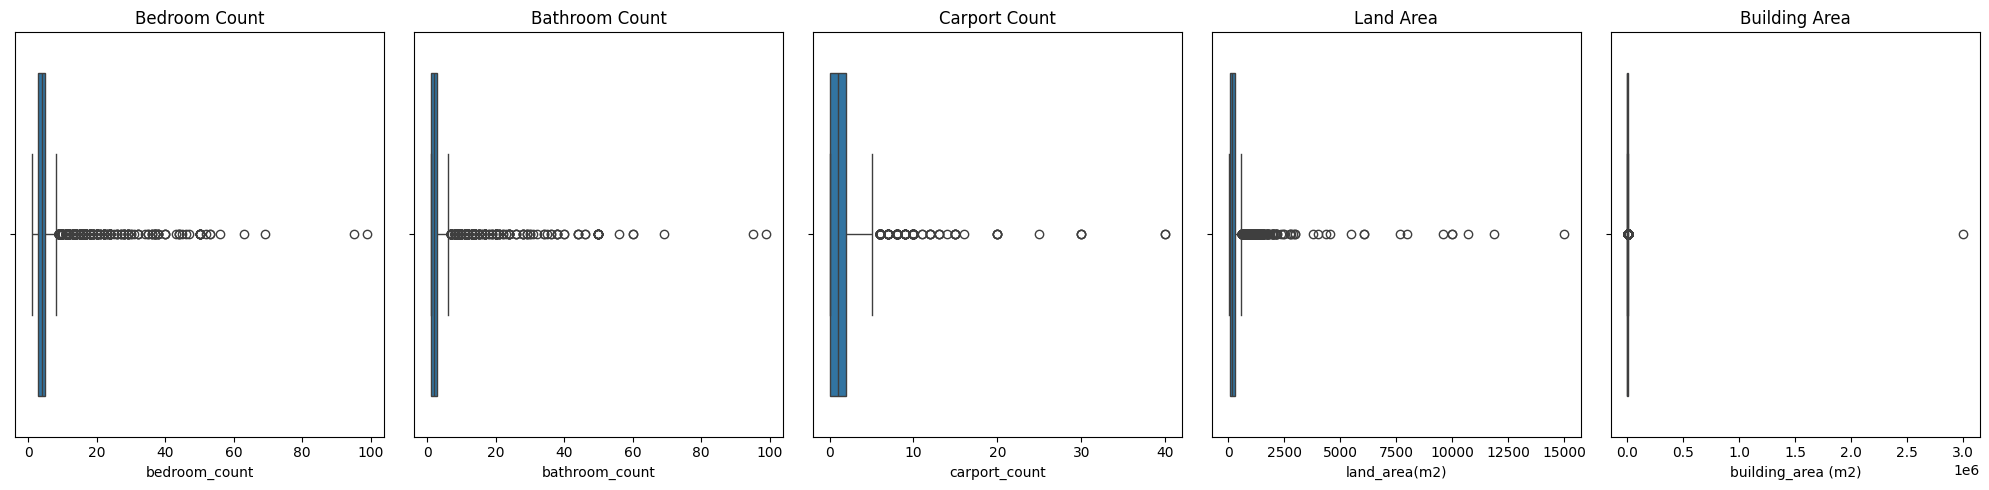

In [28]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))


sns.boxplot(x=rumah_bersih['bedroom_count'], ax=axes[0])
sns.boxplot(x=rumah_bersih['bathroom_count'], ax=axes[1])
sns.boxplot(x=rumah_bersih['carport_count'], ax=axes[2])
sns.boxplot(x=rumah_bersih['land_area(m2)'], ax=axes[3])
sns.boxplot(x=rumah_bersih['building_area (m2)'], ax=axes[4])


axes[0].set_title('Bedroom Count')
axes[1].set_title('Bathroom Count')
axes[2].set_title('Carport Count')
axes[3].set_title('Land Area')
axes[4].set_title('Building Area')


plt.tight_layout()
plt.show()


Bisa kita lihat terdapat data yang sangat jauh dari kelompok data pada fitur bedroom count, bathroom count, carport count, land area dan building area.
pada tahap selanjutnya kita akan mencoba menghilangkan outlier tersebut


Agar tidak terjadi error saat proses pembersihan outlier kita akan menghapus house name karena memiliki nilai uniqe yang sangat banyak dan tidak dibutuhkan lagi pada tahapan selanjutnya, serta melakukan encoding pada location.


In [29]:
rumah_bersih = rumah_bersih.drop('house_name', axis=1)


In [30]:
rumah_bersih

,location,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
0,"Andir, Bandung",3,2,2,2100,137,170
1,"Andir, Bandung",3,2,3,4100,202,300
2,"Andir, Bandung",5,2,1,3300,350,258
3,"Andir, Bandung",2,2,1,580,30,80
4,"Andir, Bandung",11,3,0,1300,176,176
...,...,...,...,...,...,...,...
9074,"Lengkong, Bandung",6,1,0,2800,240,280
9075,Kota Bandung,3,1,0,1000,90,180
9076,Kota Bandung,2,1,0,572,72,65
9077,"Rancasari, Bandung",6,1,0,2300,318,160


**Menangani Outliers**

In [31]:
le = LabelEncoder()
rumah_bersih['location_encoded'] = le.fit_transform(rumah_bersih['location'])
rumah_bersih = rumah_bersih.drop('location', axis=1)

In [32]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers


numerical_features = ['bedroom_count', 'bathroom_count', 'carport_count', 'land_area(m2)', 'building_area (m2)']
for feature in numerical_features:
  rumah_bersih = remove_outliers_iqr(rumah_bersih, feature)




In [33]:
rumah_bersih['location'] = le.inverse_transform(rumah_bersih['location_encoded'])
rumah_bersih = rumah_bersih.drop('location_encoded', axis=1)

**Melakukan pengecekan kembali terdap data yang sudah dibersihkan**

In [34]:
rumah_bersih.describe()

,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2)
count,6593,6593,6593,6593,6593,6593
mean,3,2,1,2585,166,165
std,1,1,1,12845,104,103
min,1,1,0,22,22,18
25%,3,1,0,875,90,80
50%,3,2,1,1650,135,141
75%,4,3,1,3000,209,224
max,8,6,5,735000,526,488


In [35]:
rumah_bersih

,bedroom_count,bathroom_count,carport_count,price (million),land_area(m2),building_area (m2),location
0,3,2,2,2100,137,170,"Andir, Bandung"
1,3,2,3,4100,202,300,"Andir, Bandung"
2,5,2,1,3300,350,258,"Andir, Bandung"
3,2,2,1,580,30,80,"Andir, Bandung"
5,5,3,1,3600,184,234,"Andir, Bandung"
...,...,...,...,...,...,...,...
9074,6,1,0,2800,240,280,"Lengkong, Bandung"
9075,3,1,0,1000,90,180,Kota Bandung
9076,2,1,0,572,72,65,Kota Bandung
9077,6,1,0,2300,318,160,"Rancasari, Bandung"


**Selanjutnya kita melakukan pengecekan kembali terhadap outliers**

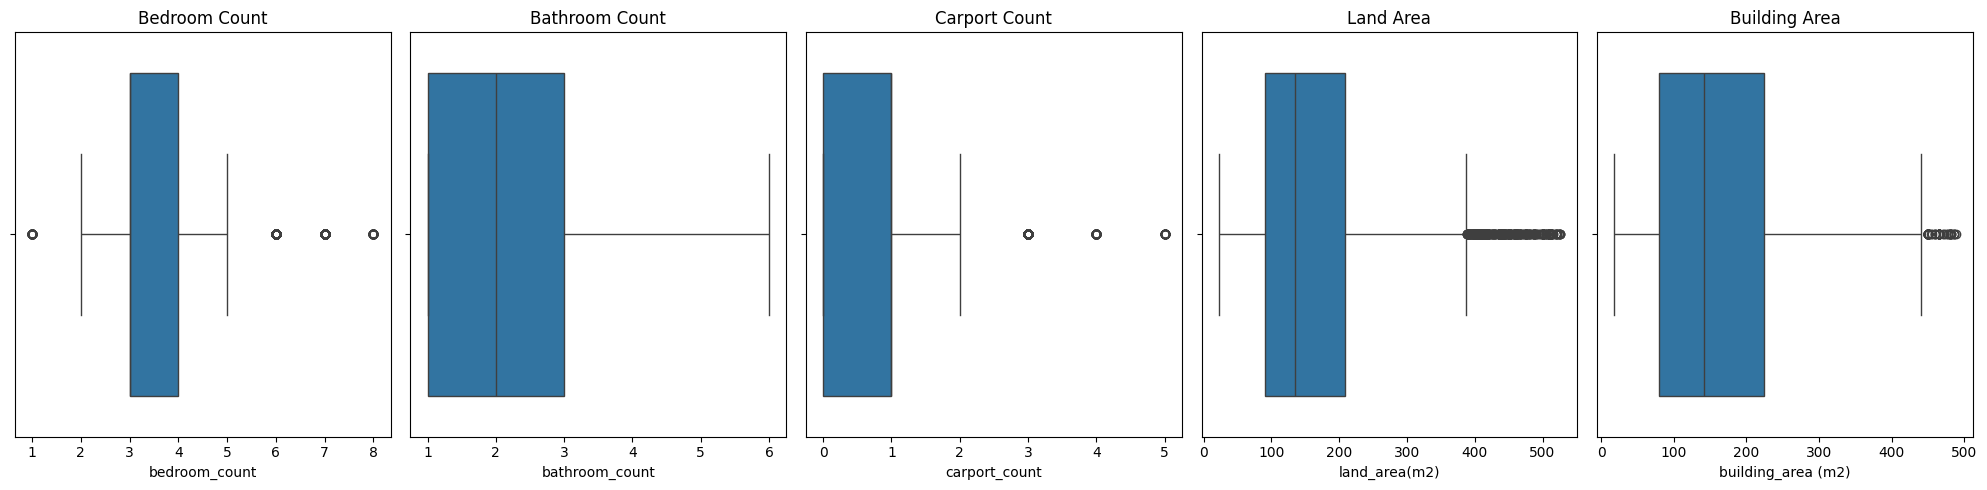

In [36]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))


sns.boxplot(x=rumah_bersih['bedroom_count'], ax=axes[0])
sns.boxplot(x=rumah_bersih['bathroom_count'], ax=axes[1])
sns.boxplot(x=rumah_bersih['carport_count'], ax=axes[2])
sns.boxplot(x=rumah_bersih['land_area(m2)'], ax=axes[3])
sns.boxplot(x=rumah_bersih['building_area (m2)'], ax=axes[4])


axes[0].set_title('Bedroom Count')
axes[1].set_title('Bathroom Count')
axes[2].set_title('Carport Count')
axes[3].set_title('Land Area')
axes[4].set_title('Building Area')


plt.tight_layout()
plt.show()


Berdasarkan data-data yang ditampilkan diatas, kita bisa melihat data sudah dibersihkan dan total data yang telah dibersihkan tersisa 6593 data, dan akan kita gunakan pada tahapan selanjutnya. walaupun masih ada outliers, kita akan menanganinya pada tahapan berikutnya agar lebih mudah dipahami.

###**3.2.5 EDA-Univariate Analysis**

Melakukan proses analisis data dengan teknik Univariate EDA

In [37]:
rumah_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6593 entries, 0 to 9078
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bedroom_count       6593 non-null   int64 
 1   bathroom_count      6593 non-null   int64 
 2   carport_count       6593 non-null   int64 
 3   price (million)     6593 non-null   int64 
 4   land_area(m2)       6593 non-null   int64 
 5   building_area (m2)  6593 non-null   int64 
 6   location            6593 non-null   object
dtypes: int64(6), object(1)
memory usage: 412.1+ KB


Pertama, bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [38]:
numerical_features = ['bedroom_count', 'bathroom_count', 'carport_count', 'price (million)', 'land_area(m2)', 'building_area (m2)']
categorical_features = ['location']

####**Categorical Features**

                           jumlah sampel  persentase
location                                            
Kota Bandung                         621           9
Buah Batu, Bandung                   367           6
Arcamanik, Bandung                   363           6
Bojongloa Kidul, Bandung             295           4
Mandalajati, Bandung                 286           4
Andir, Bandung                       280           4
Lengkong, Bandung                    268           4
Cibiru, Bandung                      262           4
Antapani, Bandung                    260           4
Batununggal, Bandung                 256           4
Babakanciparay, Bandung              253           4
Astanaanyar, Bandung                 252           4
Regol, Bandung                       232           4
Rancasari, Bandung                   231           4
Cicendo, Bandung                     226           3
Bandung Kulon, Bandung               217           3
Bandung Kidul, Bandung               208      

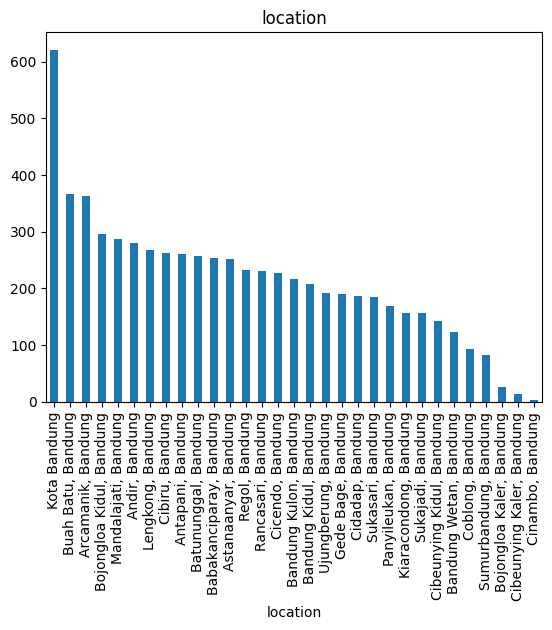

In [39]:
feature = categorical_features[0]
count = rumah_bersih[feature].value_counts()
percent = 100*rumah_bersih[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 30 kecamatan pada kota bandung yang menjadi lokasi properti. Dari data tersebut bisa kita lihat penjualan properti paling banyak berada di kecamatan Arcamanik, buahbatu, dan daerah kota bandung, serta penjulan properti paling sedikit berada pada kecamatan cibeunying kaler dan cinambo

####**Numerical Features**

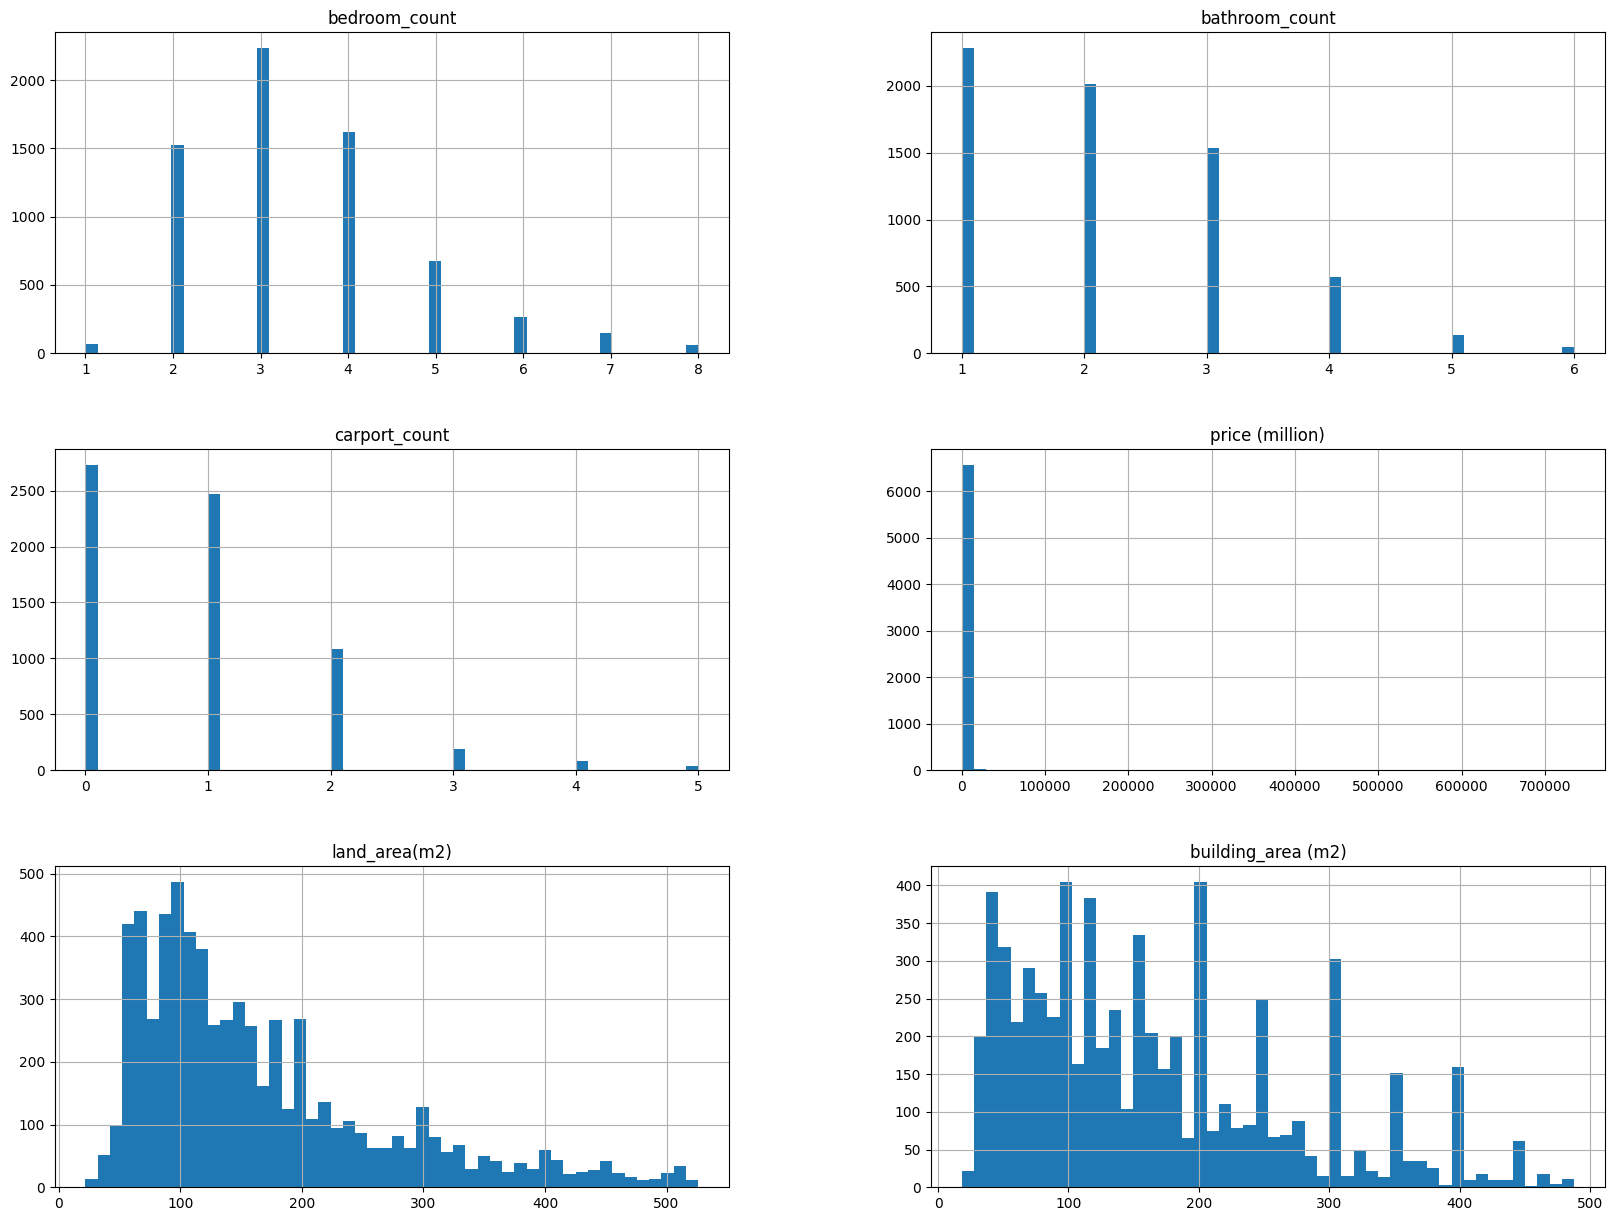

In [40]:
rumah_bersih.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan histogram diatas kita bisa melihat distribusi data pada setiap fitur numerik, berikut penjelasan detailnya:

 1. Bedroom Count:
 Sebagian besar rumah memiliki jumlah kamar tidur antara 2 sampai 4, dengan sedikit rumah yang memiliki jumlah kamar tidur lebih dari 4. Ini menunjukkan bahwa rumah dengan 2-4 kamar tidur adalah yang paling umum di pasaran.

 2. Bathroom Count:
 Distribusi data mirip dengan bedroom count, dengan sebagian besar rumah memiliki 2-3 kamar mandi. Hal ini mengindikasikan korelasi antara jumlah kamar tidur dan kamar mandi.

 3. Carport Count:
 Sebagian besar rumah memiliki carport dengan kapasitas 1-2 mobil.

 4. Price:
 Distribusi harga rumah cenderung miring ke kanan (right skewed), yang menunjukkan bahwa ada beberapa rumah dengan harga yang sangat tinggi dibandingkan dengan sebagian besar rumah. Ini adalah fenomena umum pada pasar properti, di mana beberapa properti mewah memiliki harga yang jauh lebih tinggi daripada rata-rata.

 5. Land Area:
 Data land area juga cenderung miring ke kanan. Artinya, sebagian besar rumah memiliki luas tanah yang relatif kecil, tetapi ada beberapa rumah yang memiliki luas tanah yang sangat besar.

 6. Building Area:
 Distribusi building area juga mirip dengan land area, cenderung miring ke kanan. Ini menunjukkan bahwa sebagian besar rumah memiliki luas bangunan yang relatif kecil, tetapi ada beberapa rumah dengan luas bangunan yang sangat besar.

 Kesimpulan:
 Dari histogram ini, kita bisa memahami distribusi data pada setiap fitur numerik. Selain itu, kita juga bisa melihat pola-pola tertentu, seperti korelasi antara jumlah kamar tidur dan kamar mandi, serta keberadaan outlier pada harga, luas tanah, dan luas bangunan. Informasi ini bisa membantu kita untuk lebih memahami karakteristik pasar properti di Bandung dan membantu dalam proses pembuatan model prediksi.


###**3.2.6 EDA - Multivariate Analysis**

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data

####**Categorical Features**

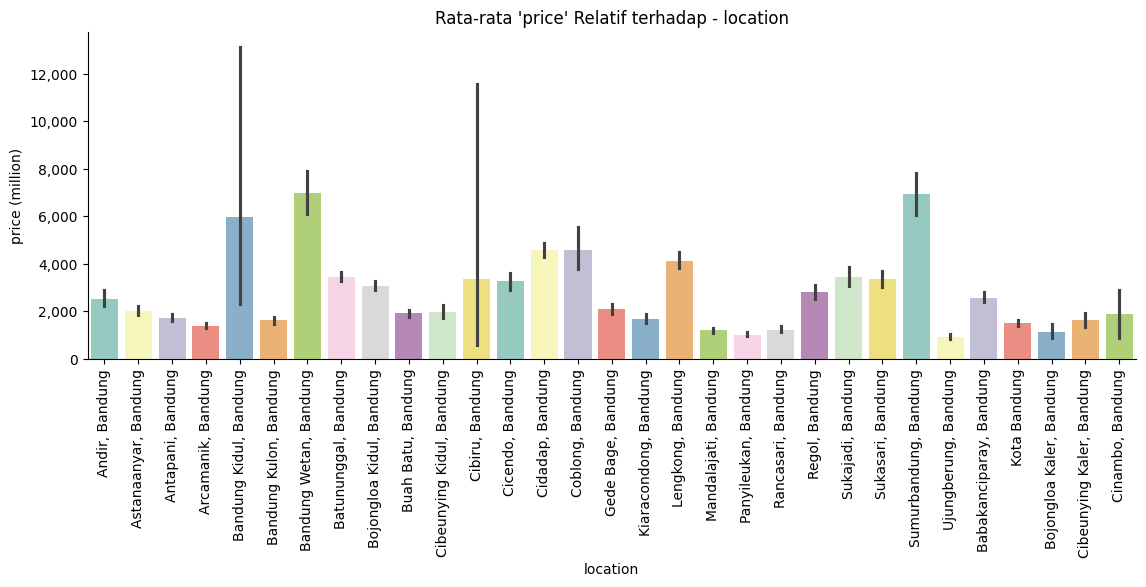

In [41]:
warnings.filterwarnings('ignore')

sns.catplot(x='location', y="price (million)", kind="bar", dodge=False, height = 4, aspect = 3,  data=rumah_bersih, palette="Set3")
plt.title("Rata-rata 'price' Relatif terhadap - location")
plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


Berdasarkan diagram rata-rata harga properti relatif terhadap lokasi, kita bisa melihat bahwa:



*   Distribusi Harga:
Diagram ini menunjukkan bahwa distribusi harga properti relatif terhadap lokasi cukup beragam. Beberapa daerah memiliki harga yang relatif lebih tinggi, sedangkan daerah lainnya memiliki harga yang relatif lebih rendah. Hal ini kemungkinan dipengaruhi oleh faktor-faktor seperti fasilitas umum, aksesibilitas, dan tingkat perkembangan daerah.
*   Pengaruh Lokasi terhadap Harga: Lokasi sangat mempengaruhi harga properti. Faktor-faktor seperti fasilitas umum, aksesibilitas, dan reputasi suatu daerah dapat berkontribusi pada perbedaan harga yang signifikan.
*   Rentang Harga: Selain rata-rata, rentang harga juga bervariasi antar lokasi. Beberapa lokasi memiliki rentang harga yang lebih lebar, yang berarti terdapat properti dengan harga yang sangat tinggi dan sangat rendah di lokasi tersebut.








**Mengangani rentang yang terlalu tinggi pada data harga dengan Winsorizing**

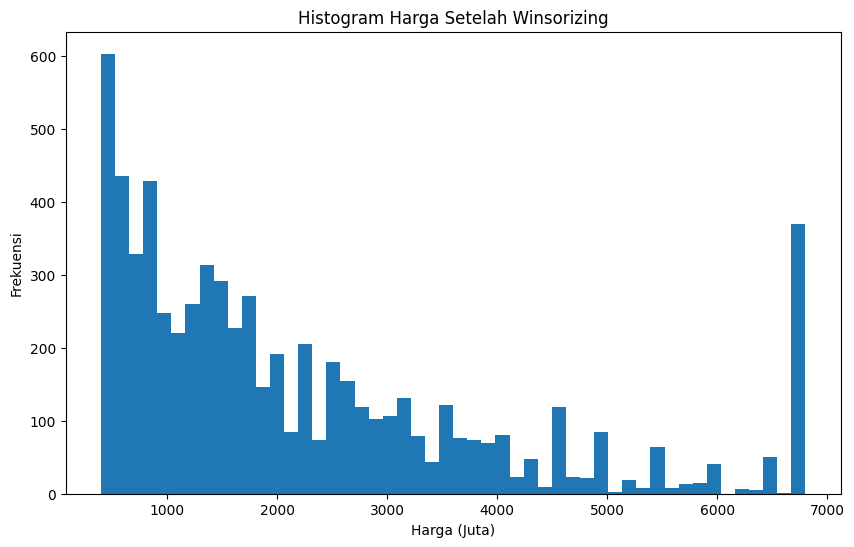

In [42]:
rumah_bersih['price (million)'] = winsorize(rumah_bersih['price (million)'], limits=[0.05, 0.05])

plt.figure(figsize=(10, 6))
plt.hist(rumah_bersih['price (million)'], bins=50)
plt.xlabel('Harga (Juta)')
plt.ylabel('Frekuensi')
plt.title('Histogram Harga Setelah Winsorizing')
plt.show()

Parameter winsorize yang digunakan:

rumah_bersih['price (million)'] = winsorize(rumah_bersih['price (million)'], limits=[0.05, 0.05])
1. limits=[0.05, 0.05]: Parameter ini menentukan batas bawah dan batas atas untuk Winsorizing.
   - 0.05 pada sisi kiri menunjukkan bahwa 5% data terendah akan digantikan dengan persentil ke-5.
   - 0.05 pada sisi kanan menunjukkan bahwa 5% data tertinggi akan digantikan dengan persentil ke-95.

Dengan kata lain, Winsorizing akan menggantikan 5% nilai terendah dan 5% nilai tertinggi dalam kolom 'price (million)' dengan persentil ke-5 dan persentil ke-95,
sehingga mengurangi pengaruh outlier pada distribusi harga.

Tujuan penggunaan Winsorizing dalam kasus ini adalah untuk mengurangi dampak outlier
pada variabel 'price (million)' agar distribusi data lebih normal dan model regresi
dapat bekerja lebih baik. Dengan membatasi nilai ekstrim, kita dapat mengurangi varians
dan meningkatkan akurasi model.


**Mengecek kembali terhadap perubahan data**

In [43]:
rumah_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6593 entries, 0 to 9078
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bedroom_count       6593 non-null   int64 
 1   bathroom_count      6593 non-null   int64 
 2   carport_count       6593 non-null   int64 
 3   price (million)     6593 non-null   int64 
 4   land_area(m2)       6593 non-null   int64 
 5   building_area (m2)  6593 non-null   int64 
 6   location            6593 non-null   object
dtypes: int64(6), object(1)
memory usage: 412.1+ KB


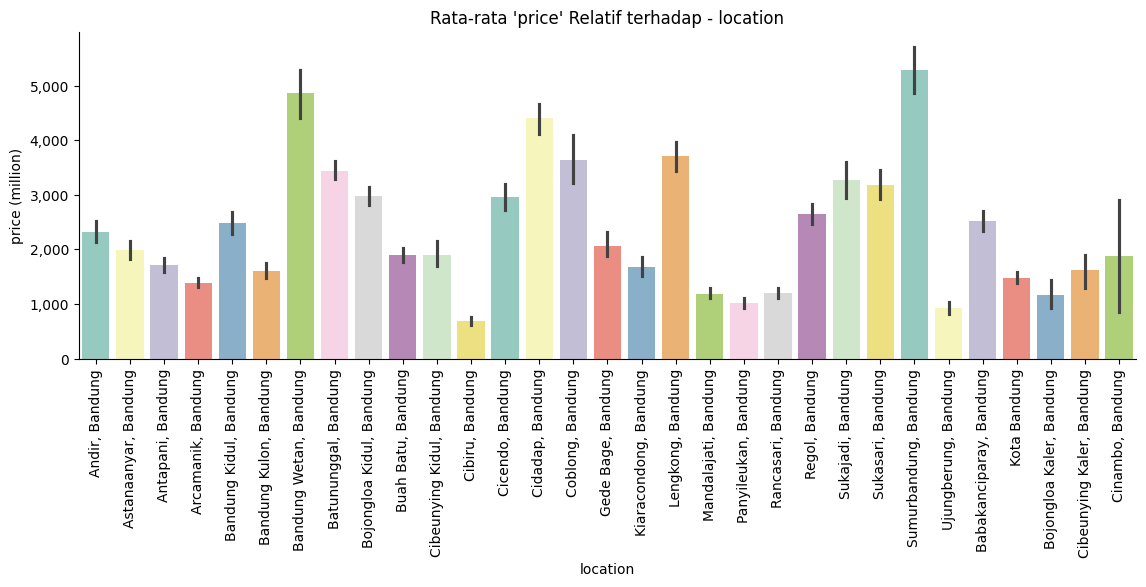

In [44]:
warnings.filterwarnings('ignore')

sns.catplot(x='location', y="price (million)", kind="bar", dodge=False, height = 4, aspect = 3,  data=rumah_bersih, palette="Set3")
plt.title("Rata-rata 'price' Relatif terhadap - location")
plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


Perhatikan rentang harga sudah lebih baik dibandingkan sebelumnya.
Berdasarkan data diatas maka dapat disimpulkan:
1. Rata-rata harga properti: 2226.20 juta
2. Kecamatan sumurbandung dan bandung wetan memiliki property degan harga jual yang cukup tinggi
3. Property dengan harga termurah berada di kecamatan cibiru dan ujungberung.

dengan data ini dapat mempermudah dalam memilih lokasi property sesuai kebutuhan dan dana pembeli.

####**Numerical Features**

Mengamati hubungan antar fitur numerik dengan fungsi pairplot() dan regplot()

In [45]:
rumah_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6593 entries, 0 to 9078
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bedroom_count       6593 non-null   int64 
 1   bathroom_count      6593 non-null   int64 
 2   carport_count       6593 non-null   int64 
 3   price (million)     6593 non-null   int64 
 4   land_area(m2)       6593 non-null   int64 
 5   building_area (m2)  6593 non-null   int64 
 6   location            6593 non-null   object
dtypes: int64(6), object(1)
memory usage: 412.1+ KB


<Axes: xlabel='building_area (m2)', ylabel='price (million)'>

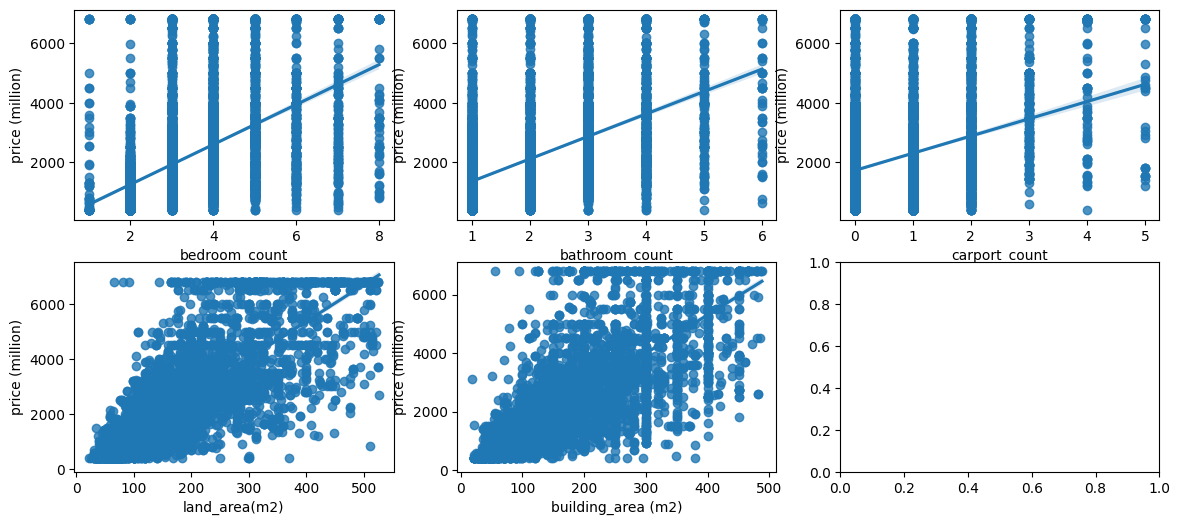

In [46]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14, 6), dpi=100)

# Pass the DataFrame to the 'data' argument
sns.regplot(data=rumah_bersih, x="bedroom_count", y="price (million)", ax=axs[0][0])
sns.regplot(data=rumah_bersih, x="bathroom_count", y="price (million)", ax=axs[0][1])
sns.regplot(data=rumah_bersih, x="carport_count", y="price (million)", ax=axs[0][2])
sns.regplot(data=rumah_bersih, x="land_area(m2)", y="price (million)", ax=axs[1][0])
sns.regplot(data=rumah_bersih, x="building_area (m2)", y="price (million)", ax=axs[1][1])

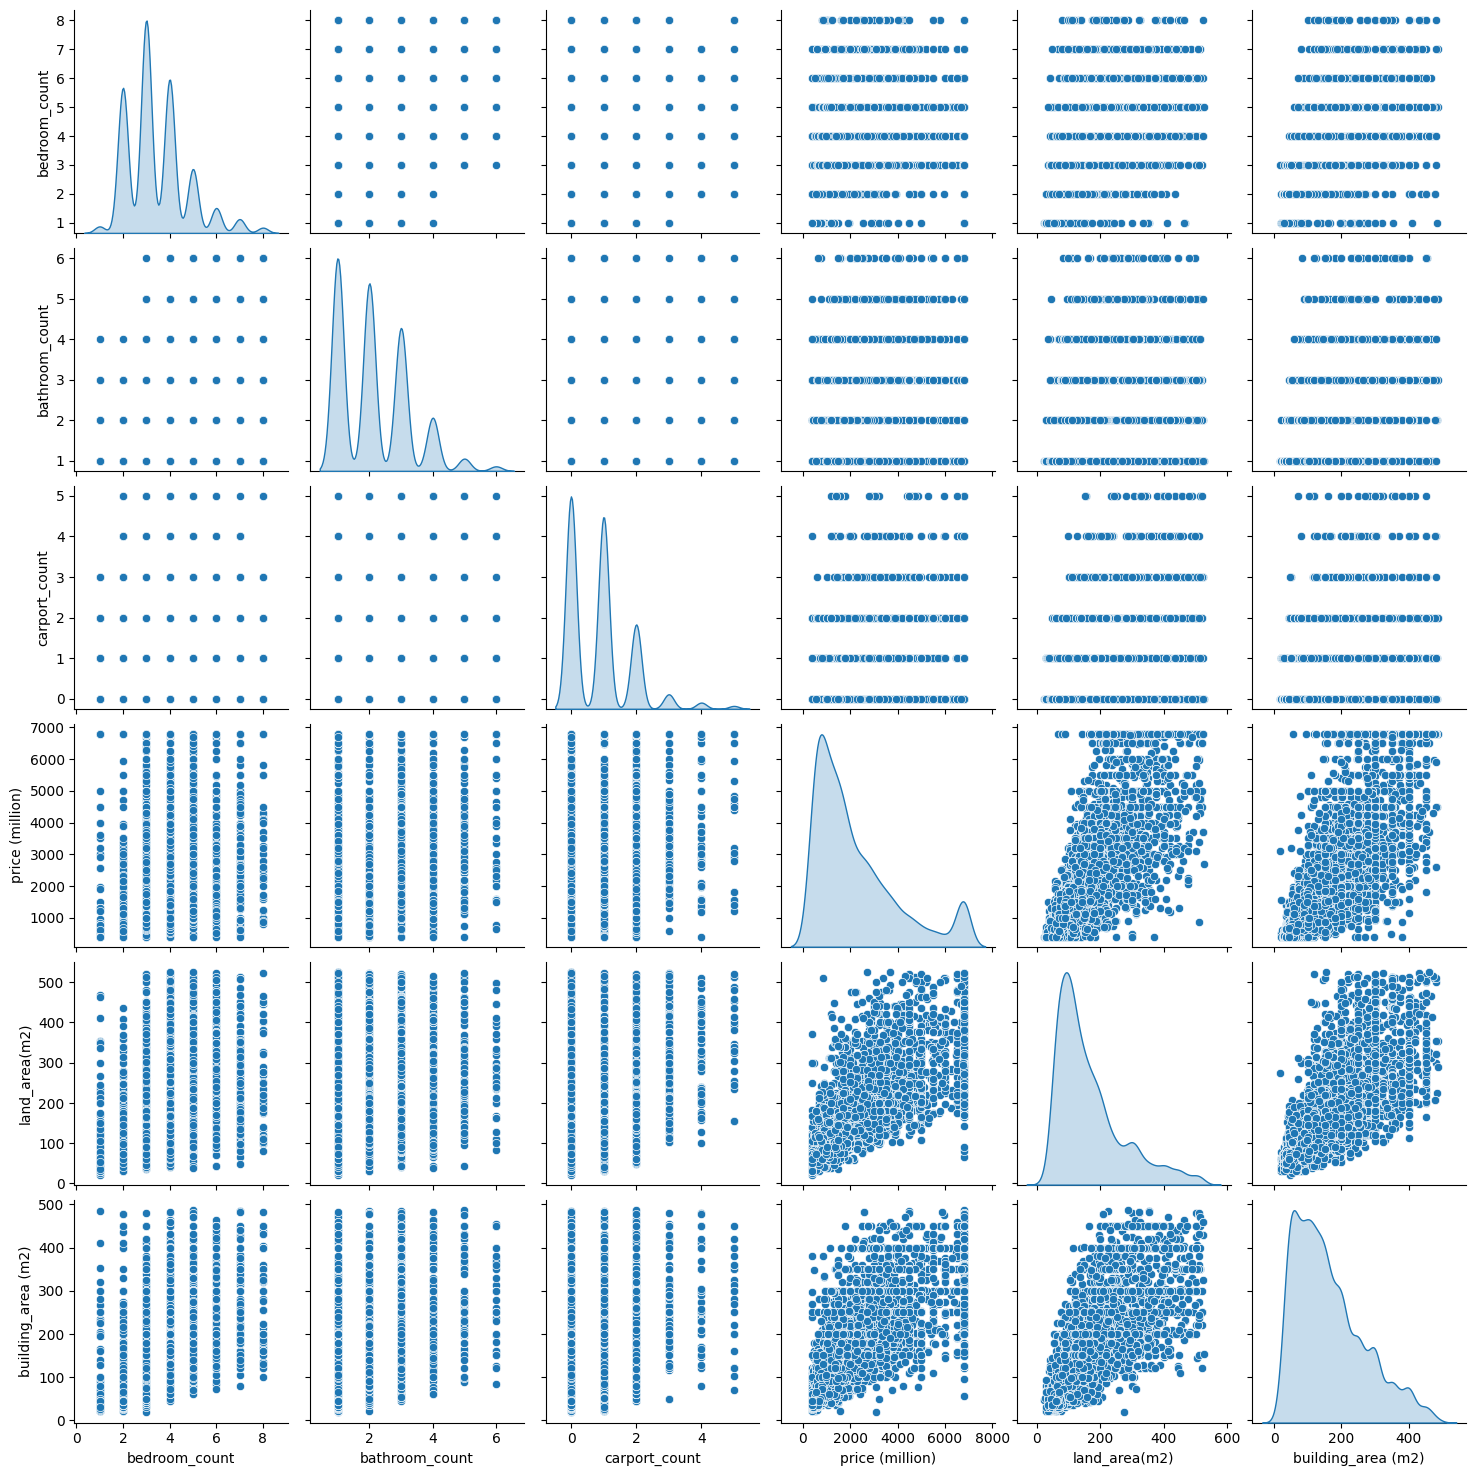

In [47]:
sns.pairplot(rumah_bersih, diag_kind = 'kde')

Berdasarkan plot yang ditampilkan, kita dapat mengamati hubungan antara 'price' dengan fitur-fitur lainnya:

1. Bedroom Count, Bathroom Count, Carport Count:
Bisa kita lihat jumlah kamar tidur dan kamar mandi tidak terlalu mempengaruhi harga jual rumah, Jika kita baca data pada tahap awal salah satu penyebabnya adalah karena beberapa property mahal tidak menginputkan jumlah kamar dan garasi dengan benar dan beberapa property ternyata hanya menjual tanah saja.

2. Land Area:
Terdapat korelasi positif yang kuat antara luas tanah dengan harga. Semakin luas tanah, cenderung semakin tinggi harga rumah. Ini menunjukkan bahwa luas tanah adalah faktor penting dalam menentukan harga properti.

3. Building Area:
Sama seperti luas tanah, terdapat korelasi positif yang kuat antara luas bangunan dengan harga. Semakin luas bangunan, cenderung semakin tinggi harga rumah.

Kesimpulan:
Berdasarkan hasil analisis, fitur yang paling berpengaruh terhadap harga rumah adalah luas tanah dan luas bangunan.
Kedua fitur ini menunjukkan korelasi yang kuat dan signifikan dengan harga.
Jumlah kamar tidur dan kamar mandi juga memiliki pengaruh positif terhadap harga, tetapi tidak sekuat luas tanah dan bangunan.
Jumlah carport memiliki pengaruh yang lebih kecil terhadap harga dibandingkan dengan fitur lainnya.




####**3.2.7 Correlation Matrix menggunakan Heatmap**

mengevaluasi skor korelasi menggunakan visualisasi diagram heatmap correlation matrix.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

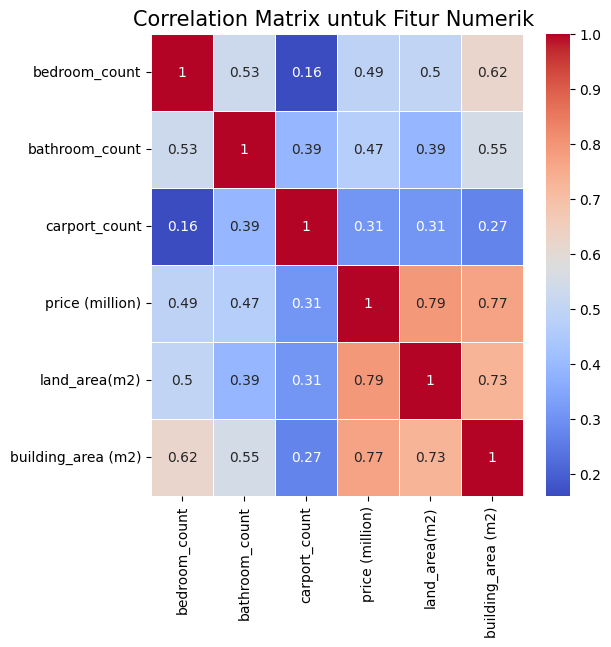

In [48]:
plt.figure(figsize=(6, 6))
correlation_matrix = rumah_bersih[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=15)

####**3.2.8 Analisis Korelasi Antar Fitur**

Berdasarkan heatmap korelasi yang ditampilkan, kita dapat mengamati hubungan antar fitur numerik:

1. Korelasi Positif:
  - Antara 'building_area (m2)' dan 'price (million)': Korelasi positif yang kuat (0.77), menunjukkan bahwa semakin luas bangunan, harga rumah cenderung semakin tinggi.
  - Antara 'land_area(m2)' dan 'price (million)': Korelasi positif yang kuat (0.79), menunjukkan bahwa semakin luas tanah, harga rumah cenderung semakin tinggi.
  - Jumlah kamar tidur dan kamar mandi masih memiliki kolerasi walau tidak terlalu kuat

2. Korelasi Lemah:
  - Antara 'carport_count' dan 'price (million)': Korelasi positif yang lemah (0.31), menunjukkan bahwa pengaruh jumlah carport terhadap harga rumah relatif kecil.


Berdasarkan data ini kita bisa menghapus carport.

In [49]:
rumah_bersih = rumah_bersih.drop('carport_count', axis=1)
rumah_bersih

,bedroom_count,bathroom_count,price (million),land_area(m2),building_area (m2),location
0,3,2,2100,137,170,"Andir, Bandung"
1,3,2,4100,202,300,"Andir, Bandung"
2,5,2,3300,350,258,"Andir, Bandung"
3,2,2,580,30,80,"Andir, Bandung"
5,5,3,3600,184,234,"Andir, Bandung"
...,...,...,...,...,...,...
9074,6,1,2800,240,280,"Lengkong, Bandung"
9075,3,1,1000,90,180,Kota Bandung
9076,2,1,572,72,65,Kota Bandung
9077,6,1,2300,318,160,"Rancasari, Bandung"


#**4. Data Preparation**

##**4.1 Encoding Fitur Kategori**

Untuk mempersiapkan data kategorikal agar dapat diproses oleh algoritma machine learning, teknik one-hot encoding sering digunakan. Teknik ini mengubah setiap kategori menjadi sebuah fitur biner (0 atau 1), di mana nilai 1 menunjukkan keberadaan kategori tersebut. Scikit-learn menyediakan kelas OneHotEncoder yang memudahkan proses encoding ini.

In [50]:
rumah_bersih = pd.concat([rumah_bersih, pd.get_dummies(rumah_bersih['location'], prefix='location', dtype=int)],axis=1)
rumah_bersih.drop(['location'], axis=1, inplace=True)
rumah_bersih.head()

,bedroom_count,bathroom_count,price (million),land_area(m2),building_area (m2),"location_Andir, Bandung","location_Antapani, Bandung","location_Arcamanik, Bandung","location_Astanaanyar, Bandung","location_Babakanciparay, Bandung",...,location_Kota Bandung,"location_Lengkong, Bandung","location_Mandalajati, Bandung","location_Panyileukan, Bandung","location_Rancasari, Bandung","location_Regol, Bandung","location_Sukajadi, Bandung","location_Sukasari, Bandung","location_Sumurbandung, Bandung","location_Ujungberung, Bandung"
0,3,2,2100,137,170,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,4100,202,300,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2,3300,350,258,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,580,30,80,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,3,3600,184,234,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**4.2 Split Data**

Membagi data menjadi 90% untuk training dan 10% untuk test.
Pembagian Data Latih (Train) 90% dan Data Uji (Test) 10% adalah praktik umum dalam machine learning. Tujuan utama dari pembagian ini adalah untuk mengevaluasi kinerja model secara objektif sebelum digunakan pada data yang benar-benar baru.

In [51]:
X = rumah_bersih.drop(["price (million)"],axis =1)
y = rumah_bersih["price (million)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 6593
Total # of sample in train dataset: 5933
Total # of sample in test dataset: 660


#**5. Model Development**

##**5.1 Model Preparation**

In [52]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Kode di atas mendefiniskan sebuah DataFrame di Pandas dengan nama models. DataFrame ini akan digunakan untuk menyimpan metrik evaluasi dari beberapa model machine learning yang berbeda, yaitu K-Nearest Neighbors (KNN), Random Forest, dan Boosting.

**Tahapan selanjutnya adalah membangun model**

##**5.2 K-Nearest Neighbor (KNN) Algorithm**

In [53]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Penjelasan Cara Kerja KNN pada Kode di Atas

1. Inisialisasi Model KNN:
   - `knn = KNeighborsRegressor(n_neighbors=10)`:
     - Kode ini membuat objek model KNN dengan parameter `n_neighbors=10`.
     - `n_neighbors` menentukan jumlah tetangga terdekat yang akan dipertimbangkan saat melakukan prediksi.
     - Dalam kasus ini, model akan mencari 10 data point terdekat dengan data yang ingin diprediksi.

2. Pelatihan Model:
   - `knn.fit(X_train, y_train)`:
     - Metode `fit` digunakan untuk melatih model KNN dengan data training (`X_train` dan `y_train`).
     - Pada tahap ini, model akan mempelajari pola dan hubungan antara fitur (X) dan target (y) dalam data training.
     - Model akan menyimpan data training dalam bentuk struktur data yang memungkinkan pencarian tetangga terdekat dengan efisien.

3. Evaluasi Model (Train MSE):
   - `models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)`:
     - Setelah model dilatih, kita perlu mengukur performanya. Kode ini menghitung Mean Squared Error (MSE) pada data training.
     - `knn.predict(X_train)`: Model digunakan untuk memprediksi harga (`y`) pada data training.
     - `mean_squared_error(...)`:  MSE dihitung dengan membandingkan prediksi model (`y_pred`) dengan nilai aktual harga (`y_true`) dari data training.
     - MSE merupakan ukuran kesalahan model dalam memprediksi harga pada data training. Nilai MSE yang rendah menunjukkan bahwa model memiliki performa baik pada data training.

Secara singkat, KNN bekerja dengan mencari data point terdekat dengan data yang ingin diprediksi.
Kemudian, berdasarkan harga dari tetangga terdekat tersebut, model akan membuat prediksi harga untuk data yang baru.
Pada kode di atas, model KNN dilatih dengan data training dan kemudian performanya diukur dengan MSE pada data training.

##**5.3 Random Forest Algorithm**

In [54]:
RF = RandomForestRegressor(n_estimators=50, max_depth=32, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Penjelasan Cara Kerja Random Forest pada Kode di Atas

1. Inisialisasi Model Random Forest:
   - `RF = RandomForestRegressor(n_estimators=50, max_depth=32, random_state=55, n_jobs=-1)`:
     - Kode ini membuat objek model Random Forest dengan beberapa parameter:
       - `n_estimators=50`: Jumlah pohon keputusan yang akan dibuat dalam ensemble. Semakin banyak pohon, semakin baik performanya, tetapi juga membutuhkan waktu yang lebih lama untuk melatih.
       - `max_depth=32`: Kedalaman maksimum setiap pohon keputusan. Kedalaman pohon yang lebih besar memungkinkan model mempelajari pola yang lebih kompleks, tetapi juga berpotensi menyebabkan overfitting (model terlalu fokus pada data training dan performanya buruk pada data baru).
       - `random_state=55`: Menentukan random seed untuk reproduksibilitas hasil. Dengan nilai yang sama, model akan menghasilkan hasil yang sama setiap kali dijalankan.
       - `n_jobs=-1`: Menggunakan semua core CPU yang tersedia untuk mempercepat pelatihan model.

2. Pelatihan Model:
   - `RF.fit(X_train, y_train)`:
     - Metode `fit` digunakan untuk melatih model Random Forest dengan data training (`X_train` dan `y_train`).
     - Pada tahap ini, model akan membangun sejumlah pohon keputusan. Setiap pohon dibangun dengan menggunakan sampel data training yang berbeda (bootstrap aggregating atau bagging) dan subset fitur yang berbeda (random subspace).
     - Setiap pohon akan mempelajari pola dan hubungan antara fitur (X) dan target (y) dalam data training yang diberikan.

3. Evaluasi Model (Train MSE):
   - `models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)`:
     - Setelah model dilatih, kita perlu mengukur performanya. Kode ini menghitung Mean Squared Error (MSE) pada data training.
     - `RF.predict(X_train)`: Model digunakan untuk memprediksi harga (`y`) pada data training.
     - `mean_squared_error(...)`: MSE dihitung dengan membandingkan prediksi model (`y_pred`) dengan nilai aktual harga (`y_true`) dari data training.
     - MSE merupakan ukuran kesalahan model dalam memprediksi harga pada data training. Nilai MSE yang rendah menunjukkan bahwa model memiliki performa baik pada data training.

Secara singkat, Random Forest bekerja dengan membangun sejumlah pohon keputusan yang berbeda,
masing-masing dilatih dengan sampel data dan fitur yang berbeda.
Kemudian, saat melakukan prediksi, setiap pohon akan memberikan hasil prediksinya sendiri.
Hasil prediksi akhir diperoleh dengan menggabungkan (aggregasi) hasil prediksi dari semua pohon,
misalnya dengan mengambil rata-rata prediksi untuk regresi.
Pada kode di atas, model Random Forest dilatih dengan data training dan kemudian performanya diukur dengan MSE pada data training.


##**5.4 Adaptive Boosting (AdaBoost) Algorithm**

In [55]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Penjelasan Cara Kerja AdaBoost pada Kode di Atas:

1. Inisialisasi Model AdaBoost:
   - `boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)`:
     - Kode ini membuat objek model AdaBoost dengan beberapa parameter:
       - `learning_rate=0.05`: Parameter ini mengontrol seberapa besar pengaruh setiap model "weak learner" terhadap model akhir. Nilai yang lebih rendah berarti bahwa setiap model memiliki pengaruh yang lebih kecil, dan model akan belajar lebih lambat.
       - `random_state=55`: Menentukan random seed untuk reproduksibilitas hasil. Dengan nilai yang sama, model akan menghasilkan hasil yang sama setiap kali dijalankan.

2. Pelatihan Model:
   - `boosting.fit(X_train, y_train)`:
     - Metode `fit` digunakan untuk melatih model AdaBoost dengan data training (`X_train` dan `y_train`).
     - Pada tahap ini, model akan membangun sejumlah model "weak learner" (biasanya pohon keputusan yang sederhana) secara berurutan.
     - Setiap "weak learner" akan dilatih dengan memperhatikan kesalahan yang dibuat oleh model sebelumnya.
     - Data yang salah diprediksi oleh model sebelumnya akan diberi bobot yang lebih besar pada pelatihan model berikutnya, sehingga model berikutnya akan lebih fokus pada data yang sulit diprediksi.

3. Evaluasi Model (Train MSE):
   - `models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)`:
     - Setelah model dilatih, kita perlu mengukur performanya. Kode ini menghitung Mean Squared Error (MSE) pada data training.
     - `boosting.predict(X_train)`: Model digunakan untuk memprediksi harga (`y`) pada data training.
     - `mean_squared_error(...)`: MSE dihitung dengan membandingkan prediksi model (`y_pred`) dengan nilai aktual harga (`y_true`) dari data training.
     - MSE merupakan ukuran kesalahan model dalam memprediksi harga pada data training. Nilai MSE yang rendah menunjukkan bahwa model memiliki performa baik pada data training.

Secara singkat, AdaBoost bekerja dengan membangun serangkaian model "weak learner" secara berurutan.
Setiap model berikutnya akan fokus pada data yang sulit diprediksi oleh model sebelumnya.
Hasil prediksi akhir diperoleh dengan menggabungkan hasil prediksi dari semua "weak learner",
dengan memberikan bobot yang lebih besar pada model yang memiliki performa lebih baik.
Pada kode di atas, model AdaBoost dilatih dengan data training dan kemudian performanya diukur dengan MSE pada data training.



#**6. Model Evaluation**

Melakukan evaluasi terhadap akurasi model

In [56]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,671,873
RF,81,549
Boosting,922,903


**Menampilkan perbandingan ketiga model**

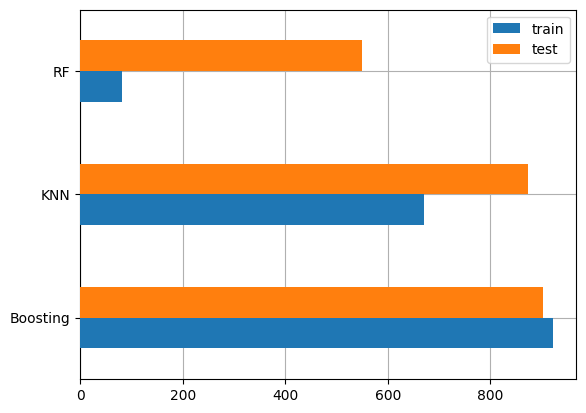

In [57]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan hasil evaluasi model, algoritma RF memiliki nilai MSE terendah pada data testing.
Hal ini mengindikasikan bahwa model RF memiliki performa yang lebih baik dalam memprediksi harga rumah dibandingkan dengan KNN dan Boosting.
Model RF mampu menangkap pola yang kompleks dalam data dengan lebih baik, yang menyebabkan model ini memiliki kemampuan generalisasi yang lebih tinggi.
Oleh karena itu, Random Forest dipilih sebagai model yang lebih optimal untuk memprediksi harga rumah pada dataset ini.


**Menampilkan skor pengaruh (konstanta korelasi) fitur-fitur yang bermanfaat terhadap price**

In [60]:
CORRELATION_WITH_PRICE = rumah_bersih.corr()['price (million)']
print("Fitur yang Berpengaruh Terhadap Harga:")
for feature, correlation in CORRELATION_WITH_PRICE.items():
  if abs(correlation) > 0.5 and feature != 'price (million)':  # Menampilkan fitur dengan korelasi di atas 0.5 (kecuali 'price (million)')
    print(f"- {feature}: {correlation}")


Fitur yang Berpengaruh Terhadap Harga:
- land_area(m2): 0.7942173599776585
- building_area (m2): 0.7695145792563


Jika kita perhatikan fitur yang paling bermanfaat dalam menentukan harga rumah atau properti adalah luas tanah dan luas bangunan. jika kita lihat skornya yang hanya mencapai 79%, ini disebabkan karena harga propery mewah cenderung bervariasi dan lebih mahal dibandingkan harga rumah lainnya.

In [61]:
print("Fitur yang Kurang Berpengaruh Terhadap Harga:")
for feature, correlation in CORRELATION_WITH_PRICE.items():
  if abs(correlation) < 0.5 and feature != 'price (million)':  # Menampilkan fitur dengan korelasi di atas 0.4 (kecuali 'price (million)')
    print(f"- {feature}: {correlation}")


Fitur yang Kurang Berpengaruh Terhadap Harga:
- bedroom_count: 0.49053328905097987
- bathroom_count: 0.4706635919308809
- location_Andir, Bandung: 0.011964932837782955
- location_Antapani, Bandung: -0.0588840197765407
- location_Arcamanik, Bandung: -0.11463822014395805
- location_Astanaanyar, Bandung: -0.02721011425031076
- location_Babakanciparay, Bandung: 0.03276577829887727
- location_Bandung Kidul, Bandung: 0.026041246819529046
- location_Bandung Kulon, Bandung: -0.06469649951101109
- location_Bandung Wetan, Bandung: 0.20785077039884564
- location_Batununggal, Bandung: 0.13946553948164603
- location_Bojongloa Kaler, Bandung: -0.03782189776070825
- location_Bojongloa Kidul, Bandung: 0.09268297089557495
- location_Buah Batu, Bandung: -0.044971603334660847
- location_Cibeunying Kaler, Bandung: -0.015959786520106392
- location_Cibeunying Kidul, Bandung: -0.027080294791700103
- location_Cibiru, Bandung: -0.1789815413160332
- location_Cicendo, Bandung: 0.07839111378787122
- location_Cida

Selanjutnya dari skor kolerasi antara fitur lainnya dengan harga menunjukkan bahwa :
- jumlah kamar mandi dan kamar tidur tidak terlalu berpengaruh terhadap harga rumah, namun tetap bisa dijadikan sebagai tolak ukur dalam menentukan harga rumah walaupun tidak terlalu signifikan.
- Berdasarkan skor diatas, kita dapat menyimpulkan bahwa lokasi tidak mempengaruhi harga rumah dikota bandung

**Menguji model dengan melakukan prediksi menggunakan beberapa data dari data test.**

In [62]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

df_pred = pd.DataFrame(pred_dict)


for name in model_dict.keys():
  df_pred['diff_'+name] = abs(df_pred['y_true'] - df_pred['prediksi_'+name])


df_sorted = df_pred.sort_values(by=['diff_RF'])

print(df_sorted)


      y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting  diff_KNN  diff_RF  \
5848    1100          1078         1080               1664        22       20   
2183    4700          5510         4667               5378       810       33   
8512    2950          3540         2915               4135       590       35   
4785     400           589          445                768       189       45   
4683    1600          1377         1687                806       223       87   
8488    1750          1922         2450               1746       172      700   
727     2500          3240         3557               3002       740     1057   
4572    2710          1436         1527               1664      1274     1183   
8744    5750          3912         3603               5164      1838     2147   
2929    5300          2332         2457               2570      2968     2843   

      diff_Boosting  
5848            564  
2183            678  
8512           1185  
4785            368 

Dari 10 prediksi diatas bisa kita lihat pada kolom diff_RF, dimana selisih antara data sebenarnya dan data prediksi sangat kecil dibandingkan selisih pada KNN dan boosting.

Berdasarkan perbandingan prediksi dengan nilai sebenarnya, dapat disimpulkan bahwa ketiga model (KNN, RF, dan Boosting) mampu memprediksi harga rumah dengan cukup baik.
Namun, Random Forest memiliki keunggulan dalam hal akurasi dan kemampuan generalisasi, sehingga menjadi pilihan yang lebih baik untuk memprediksi harga rumah pada dataset ini.